In [34]:
# 로지스틱 회귀분석 예제 : # 성별(Sex), 나이(Age), 객실등급(Pclass), 요금(Fare)이 생존에 어느 정도의 영향을 미쳤는가?

import pandas as pd

df = pd.read_csv("c:/data/titanic/train3.csv")
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


In [49]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [35]:
# 생존여부를 기준으로 한 평균값들
df.groupby("Survived").mean()

,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
Survived,,,,,,,,,
0,0.145719,0.176685,0.677596,0.852459,0.147541,30.483607,0.553734,0.329690,22.117887
1,0.397661,0.254386,0.347953,0.318713,0.681287,28.595526,0.473684,0.464912,48.395408


Text(0, 0.5, 'frequency')

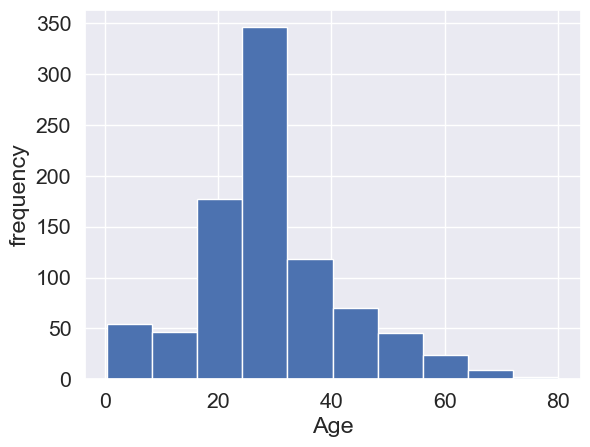

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

df["Age"].hist()
plt.xlabel('Age')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

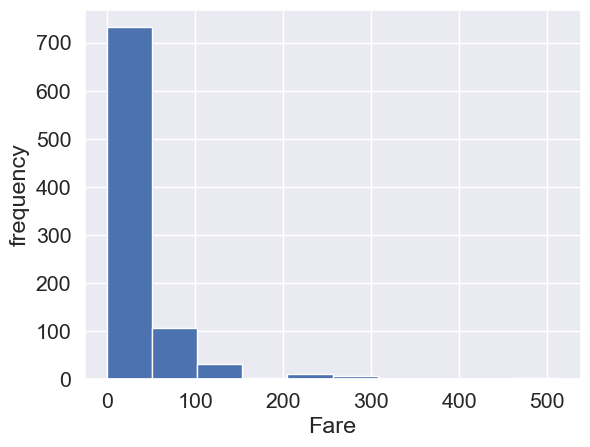

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

df['Fare'].hist()
plt.xlabel('Fare')
plt.ylabel('frequency')

C:\Users\user\AppData\Local\Temp\ipykernel_8552\1343853874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette=colors)


Text(0.5, 1.0, 'classified\n (0:dead, 1:survive)')

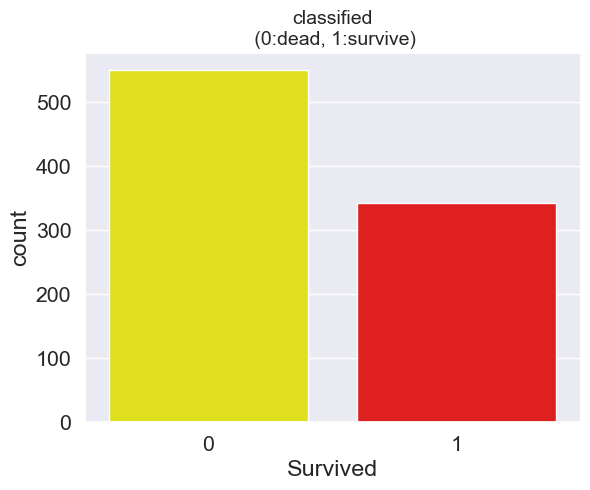

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["yellow", "red"]

sns.countplot(x="Survived", data=df, palette=colors)
plt.title("classified\n (0:dead, 1:survive)", fontsize=14)
# 불균형 데이터셋

In [39]:
train_cols = df.columns[1:]

X = df[train_cols]  # 독립변수
y = df["Survived"]

print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [16]:
# 언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Survived"])
df2 = pd.concat([X_samp, y_samp], axis=1)

In [41]:
X = X_samp[train_cols]  # 독립변수
y = y_samp["Survived"]

In [42]:
import statsmodels.api as sm

model = sm.Logit(y, X)
result = model.fit()
result.summary2()

# 모델의 설명력 32.2%
# Parch, Fare는 유의하지 않음
# 해석 : coef(회귀계수)를 기준으로 볼 때의 생존 확률
# 좌석등급 : 1등석 > 2등석 > 3등석 순으로 생존률이 높았다.
# 성별 : 여성은 생존 확률이 높았다.
# 1등석 > 2등석 > 성별 > 3등석순으로 생존 여부에 영향을 미쳤음

         Current function value: 0.466486
         Iterations: 35


c:\python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Method:             MLE       
Dependent Variable:    Survived           Pseudo R-squared:   0.327     
Date:                  2024-03-18 10:16   AIC:                656.1528  
No. Observations:      684                BIC:                696.9045  
Df Model:              8                  Log-Likelihood:     -319.08   
Df Residuals:          675                LL-Null:            -474.11   
Converged:             0.0000             LLR p-value:        2.9525e-62
No. Iterations:        35.0000            Scale:              1.0000    
------------------------------------------------------------------------
         Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
------------------------------------------------------------------------
Pclass1  1.7178 5586951.9870  0.0000 1.0000 -10950222.9600 10950226.3957
Pclass2  0.6262 5586951.9870  0.0000 1.0000 -10950224.0517 10950225.3041
Pclass3 -0.3330 5586951.9870 -0.0000 1.0000 -10950225.0109 10950224.3449
male    -0.3334 5586951.9870 -0.0000 1.0000 -10950225.0113 10950224.3444
female   2.3445 5586951.9870  0.0000 1.0000 -10950222.3334 10950227.0224
Age     -0.0355       0.0088 -4.0333 0.0001        -0.0527       -0.0182
SibSp   -0.3053       0.1234 -2.4750 0.0133        -0.5471       -0.0635
Parch    0.0078       0.1496  0.0519 0.9586        -0.2854        0.3009
Fare     0.0024       0.0028  0.8660 0.3865        -0.0030        0.0078
========================================================================

"""

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0
)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("학습용: ", model.score(X_train, y_train))
print("검증용: ", model.score(X_test, y_test))

학습용:  0.7678244972577697
검증용:  0.8029197080291971


In [44]:
# confusion matrix(혼동행렬, 오분류표) 출력

from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)

cm = confusion_matrix(y_test, pred)
cm

array([[56, 13],
       [14, 54]], dtype=int64)

In [45]:
df_cm = pd.DataFrame(cm, index=["0", "1"], columns=["0", "1"])
df_cm

,0,1
0,56,13
1,14,54


<Axes: title={'center': 'confusion_matrix'}>

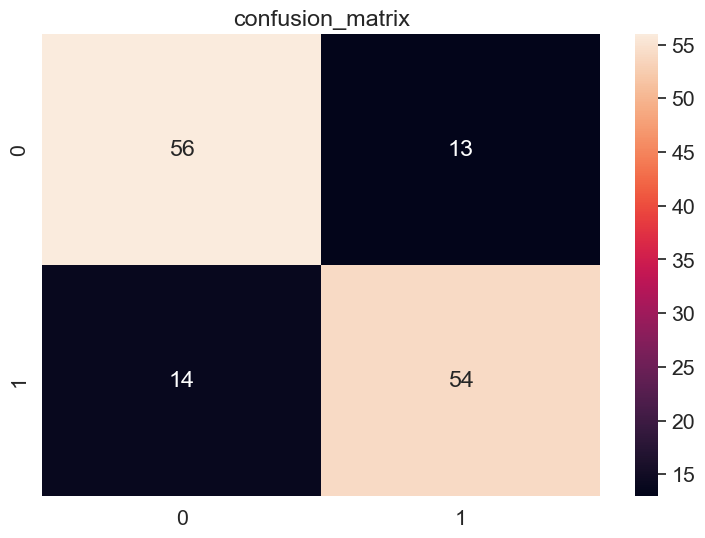

In [46]:
from matplotlib import pyplot as plt

sns.set(font_scale=1.4)
plt.figure(figsize=(9, 6))
plt.title("confusion_matrix")
sns.heatmap(df_cm, annot=True)
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자

In [47]:
# 새로운 값 예측
# 1등석, 2등석, 3등석, 남성, 여성, 나이, 형제자매, 부모자녀, 요금

# 3등석, 남성, 19세, 형제자매1, 부모자녀0, 요금50
person1 = [[0, 0, 1, 1, 0, 19, 1, 0, 50]]

# 1등석, 여성, 17세, 형제자매0, 부모자녀2, 요금30
person2 = [[1, 0, 0, 0, 1, 17, 0, 2, 30]]

# 2등석, 여성, 40세, 형제자매2, 부모자녀0, 요금70
person3 = [[0, 1, 0, 0, 1, 40, 2, 0, 70]]

print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))
print(model.predict_proba(person1))
print(model.predict_proba(person2))
print(model.predict_proba(person3))

[0]
[1]
[1]
[[0.82780847 0.17219153]]
[[0.04441093 0.95558907]]
[[0.21685432 0.78314568]]


c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with

In [48]:
import joblib

joblib.dump(model, "c:/data/titanic/titanic_logit.model")

['c:/data/titanic/titanic_logit.model']